In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import MBart50TokenizerFast, M2M100Tokenizer, AutoTokenizer
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# Specify the path including the file name where you want to save the file in your Google Drive
file_path = '/content/drive/My Drive/highly_aligned_df.csv'

df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Initialize tokenizers for each model
tokenizer_mbart50 = MBart50TokenizerFast.from_pretrained('facebook/mbart-large-50-many-to-many-mmt')
tokenizer_m2m100 = M2M100Tokenizer.from_pretrained('facebook/m2m100_418M')
tokenizer_nllb200 = AutoTokenizer.from_pretrained('facebook/nllb-200-distilled-600M')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

In [6]:
df

,Unnamed: 0,hr,nl
0,0,U početku stvori Bog nebo i zemlju .,In het begin heeft God de hemelen en de aarde ...
1,1,Zemlja bijaše pusta i prazna tama se prostiral...,De aarde was woest en leeg en de Geest van God...
2,2,I reče Bog Neka bude svjetlost I bi svjetlost .,Toen zei God Laat er licht zijn . En toen was ...
3,3,"Svjetlost prozva Bog dan , a tamu prozva noć ....",Het licht noemde Hij dag en het donker nacht ....
4,4,"Kopno prozva Bog zemlja , a skupljene vode mor...",God noemde het droge land aarde en het samenge...
...,...,...,...
1311061,1311061,Al Gore o uklanjanju klimatske krize,Al Gore over het afwenden van de klimaatcrisis
1311062,1311062,Kolumnist New York Timesa David Pogue cilja na...,"David Pogue , columnist van de New York Times ..."
1311063,1311063,David Pogue kaže Jednostavnost je to što se pr...,David Pogue Eenvoud verkoopt
1311064,1311064,"U emocijama nabijenom govoru Majora Carter , d...",In een emotionele lezing geeft Majora Carter u...


In [7]:
df.dropna(inplace=True)

In [8]:
df

,Unnamed: 0,hr,nl
0,0,U početku stvori Bog nebo i zemlju .,In het begin heeft God de hemelen en de aarde ...
1,1,Zemlja bijaše pusta i prazna tama se prostiral...,De aarde was woest en leeg en de Geest van God...
2,2,I reče Bog Neka bude svjetlost I bi svjetlost .,Toen zei God Laat er licht zijn . En toen was ...
3,3,"Svjetlost prozva Bog dan , a tamu prozva noć ....",Het licht noemde Hij dag en het donker nacht ....
4,4,"Kopno prozva Bog zemlja , a skupljene vode mor...",God noemde het droge land aarde en het samenge...
...,...,...,...
1311061,1311061,Al Gore o uklanjanju klimatske krize,Al Gore over het afwenden van de klimaatcrisis
1311062,1311062,Kolumnist New York Timesa David Pogue cilja na...,"David Pogue , columnist van de New York Times ..."
1311063,1311063,David Pogue kaže Jednostavnost je to što se pr...,David Pogue Eenvoud verkoopt
1311064,1311064,"U emocijama nabijenom govoru Majora Carter , d...",In een emotionele lezing geeft Majora Carter u...


In [9]:
from tqdm.auto import tqdm
tqdm.pandas()

# Function to calculate token counts using a given tokenizer
def calculate_token_counts(text, tokenizer):
    return len(tokenizer.tokenize(text))

# Tokenize and calculate token counts for the 'nl' (Dutch) and 'hr' (Croatian) columns with each tokenizer
df['nl_mbart50_count'] = df['nl'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_mbart50))
df['hr_mbart50_count'] = df['hr'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_mbart50))

df['nl_m2m100_count'] = df['nl'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_m2m100))
df['hr_m2m100_count'] = df['hr'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_m2m100))

df['nl_nllb200_count'] = df['nl'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_nllb200))
df['hr_nllb200_count'] = df['hr'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_nllb200))

  0%|          | 0/1311065 [00:00<?, ?it/s]

  0%|          | 0/1311065 [00:00<?, ?it/s]

  0%|          | 0/1311065 [00:00<?, ?it/s]

  0%|          | 0/1311065 [00:00<?, ?it/s]

  0%|          | 0/1311065 [00:00<?, ?it/s]

  0%|          | 0/1311065 [00:00<?, ?it/s]

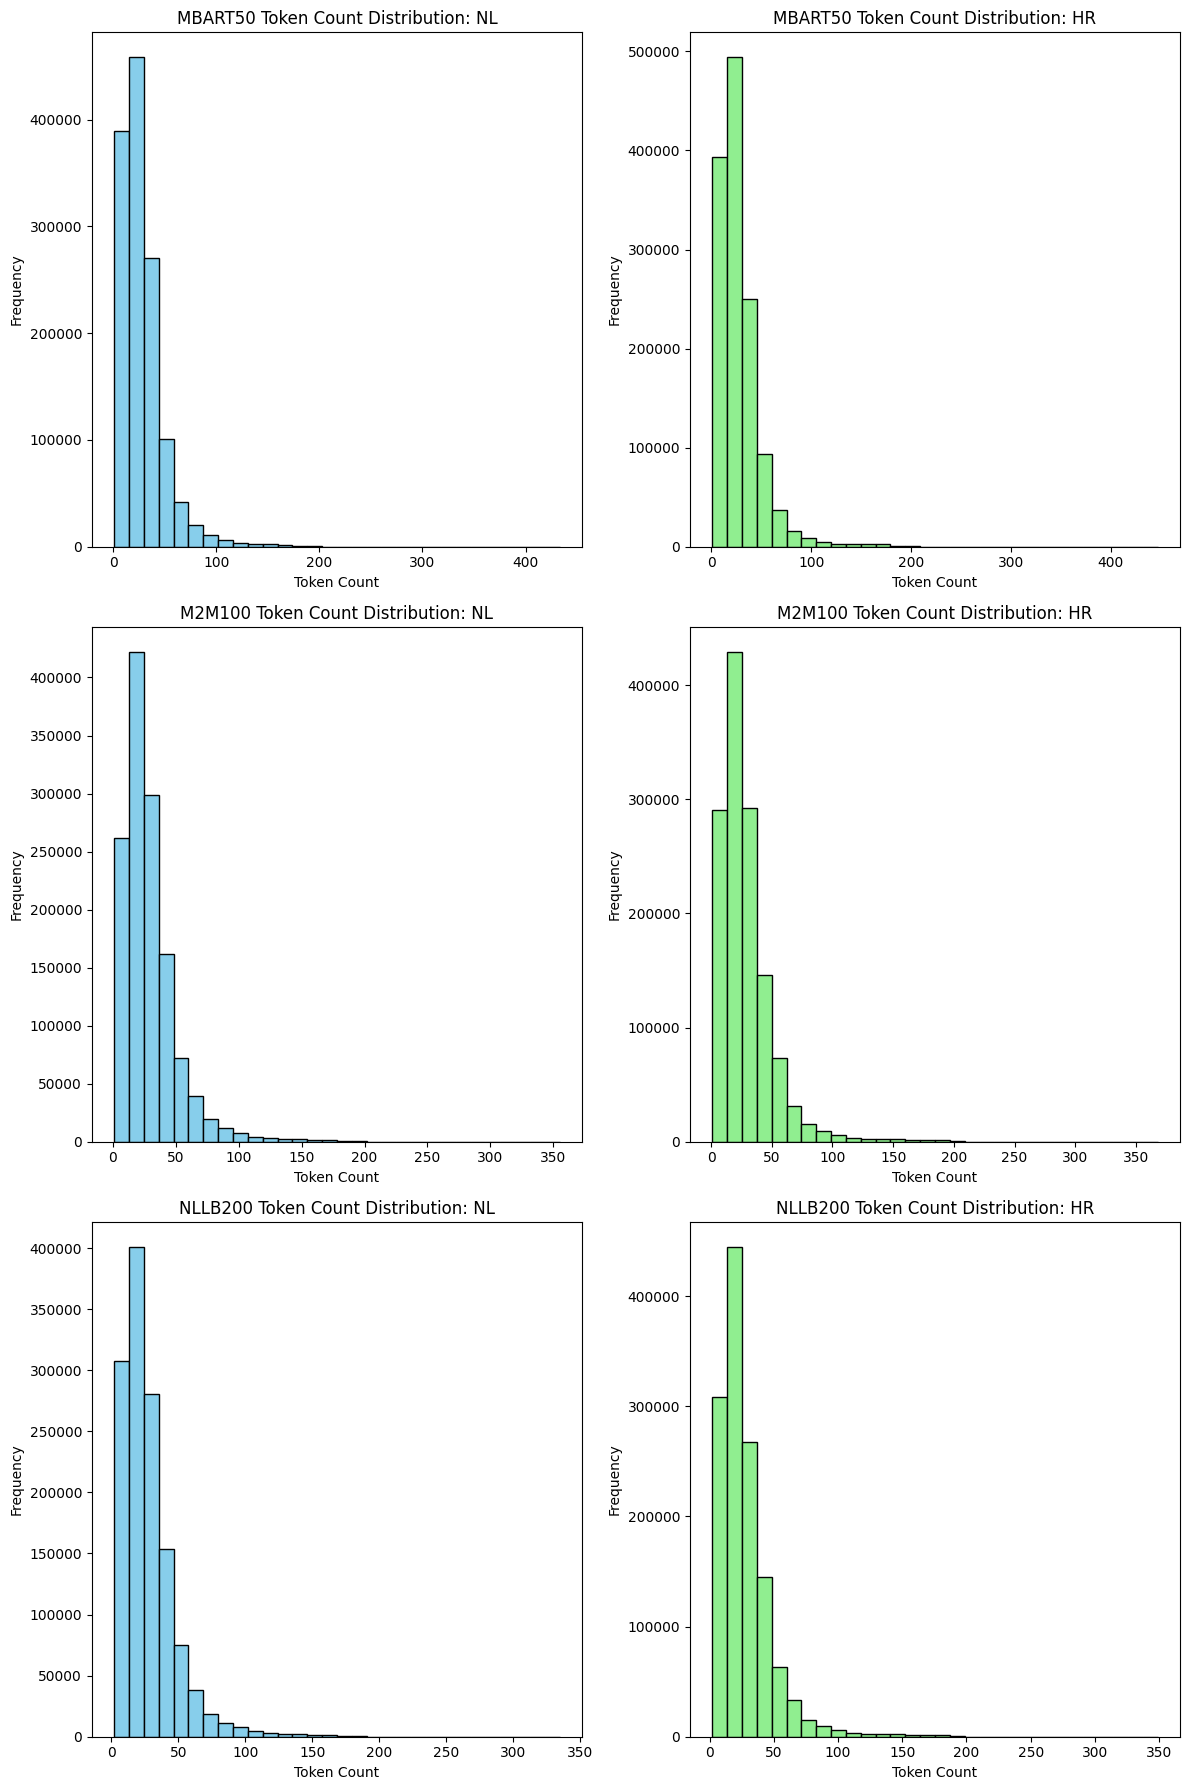

In [18]:
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' and token count columns are correctly set up

# Define the plot size and the number of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.ravel()  # Flatten the axes array for easy iteration

models = ['MBART50', 'M2M100', 'NLLB200']
token_counts_nl = ['nl_mbart50_count', 'nl_m2m100_count', 'nl_nllb200_count']
token_counts_hr = ['hr_mbart50_count', 'hr_m2m100_count', 'hr_nllb200_count']

# Iterate over the models and their respective token count columns for NL and HR
for i, (model, nl_count, hr_count) in enumerate(zip(models, token_counts_nl, token_counts_hr)):
    # Plot for NL
    ax = axes[i*2]  # Select the appropriate subplot for NL
    ax.hist(df[nl_count], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'{model} Token Count Distribution: NL')
    ax.set_xlabel('Token Count')
    ax.set_ylabel('Frequency')

    # Plot for HR
    ax = axes[i*2 + 1]  # Select the appropriate subplot for HR
    ax.hist(df[hr_count], bins=30, color='lightgreen', edgecolor='black')
    ax.set_title(f'{model} Token Count Distribution: HR')
    ax.set_xlabel('Token Count')
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust the layout
plt.show()

In [21]:
# Calculate the 95th percentile for the token counts
percentiles_nl = df[['nl_mbart50_count', 'nl_m2m100_count', 'nl_nllb200_count']].quantile(0.95)
percentiles_hr = df[['hr_mbart50_count', 'hr_m2m100_count', 'hr_nllb200_count']].quantile(0.95)

# Determine the max token length based on the highest 95th percentile value
max_token_length = max(percentiles_nl.max(), percentiles_hr.max())

print(f"95th percentile token lengths for NL: \n{percentiles_nl}")
print(f"95th percentile token lengths for HR: \n{percentiles_hr}")
print(f"Suggested maximum token length based on the highest 95th percentile: {max_token_length}")

95th percentile token lengths for NL: 
nl_mbart50_count    65.0
nl_m2m100_count     67.0
nl_nllb200_count    65.0
Name: 0.95, dtype: float64
95th percentile token lengths for HR: 
hr_mbart50_count    65.0
hr_m2m100_count     67.0
hr_nllb200_count    64.0
Name: 0.95, dtype: float64
Suggested maximum token length based on the highest 95th percentile: 67.0


In [23]:
# Calculate the 95th percentile for the token counts
percentiles_nl = df[['nl_mbart50_count', 'nl_m2m100_count', 'nl_nllb200_count']].quantile(0.93)
percentiles_hr = df[['hr_mbart50_count', 'hr_m2m100_count', 'hr_nllb200_count']].quantile(0.93)

# Determine the max token length based on the highest 95th percentile value
max_token_length = max(percentiles_nl.max(), percentiles_hr.max())

print(f"95th percentile token lengths for NL: \n{percentiles_nl}")
print(f"95th percentile token lengths for HR: \n{percentiles_hr}")
print(f"Suggested maximum token length based on the highest 95th percentile: {max_token_length}")

95th percentile token lengths for NL: 
nl_mbart50_count    58.0
nl_m2m100_count     60.0
nl_nllb200_count    58.0
Name: 0.93, dtype: float64
95th percentile token lengths for HR: 
hr_mbart50_count    58.0
hr_m2m100_count     59.0
hr_nllb200_count    57.0
Name: 0.93, dtype: float64
Suggested maximum token length based on the highest 95th percentile: 60.0


In [24]:
# Calculate the coverage for a max token length of 64
max_length = 64

# Calculate the percentage of token counts less than or equal to the max length for each tokenizer
coverage_nl_mbart50 = (df['nl_mbart50_count'] <= max_length).mean() * 100
coverage_hr_mbart50 = (df['hr_mbart50_count'] <= max_length).mean() * 100

coverage_nl_m2m100 = (df['nl_m2m100_count'] <= max_length).mean() * 100
coverage_hr_m2m100 = (df['hr_m2m100_count'] <= max_length).mean() * 100

coverage_nl_nllb200 = (df['nl_nllb200_count'] <= max_length).mean() * 100
coverage_hr_nllb200 = (df['hr_nllb200_count'] <= max_length).mean() * 100

# Calculate overall coverage (assuming you want all tokenizers to be within the max length for a row to be considered)
overall_coverage_nl = min(coverage_nl_mbart50, coverage_nl_m2m100, coverage_nl_nllb200)
overall_coverage_hr = min(coverage_hr_mbart50, coverage_hr_m2m100, coverage_hr_nllb200)

# Report the coverage
print(f"Coverage for NL at max length {max_length}:")
print(f"MBART50: {coverage_nl_mbart50:.2f}%")
print(f"M2M100: {coverage_nl_m2m100:.2f}%")
print(f"NLLB200: {coverage_nl_nllb200:.2f}%")
print(f"Overall NL Coverage: {overall_coverage_nl:.2f}%\n")

print(f"Coverage for HR at max length {max_length}:")
print(f"MBART50: {coverage_hr_mbart50:.2f}%")
print(f"M2M100: {coverage_hr_m2m100:.2f}%")
print(f"NLLB200: {coverage_hr_nllb200:.2f}%")
print(f"Overall HR Coverage: {overall_coverage_hr:.2f}%\n")

# The lesser of the two overall coverages will be the effective coverage for both languages.
effective_coverage = min(overall_coverage_nl, overall_coverage_hr)
print(f"Effective coverage for both NL and HR at max length {max_length}: {effective_coverage:.2f}%")

Coverage for NL at max length 64:
MBART50: 94.79%
M2M100: 94.34%
NLLB200: 94.99%
Overall NL Coverage: 94.34%

Coverage for HR at max length 64:
MBART50: 94.92%
M2M100: 94.51%
NLLB200: 95.10%
Overall HR Coverage: 94.51%

Effective coverage for both NL and HR at max length 64: 94.34%


In [25]:
# Specify the path including the file name where you want to save the file in your Google Drive
file_path = '/content/drive/My Drive/evaluation_df.csv'

evaluation_df = pd.read_csv(file_path)

In [28]:
from tqdm.auto import tqdm
tqdm.pandas()

# Tokenize and calculate token counts for the 'nl' (Dutch) and 'hr' (Croatian) columns with each tokenizer
evaluation_df['nl_mbart50_count'] = evaluation_df['Dutch'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_mbart50))
evaluation_df['hr_mbart50_count'] = evaluation_df['Croatian'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_mbart50))

evaluation_df['nl_m2m100_count'] = evaluation_df['Dutch'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_m2m100))
evaluation_df['hr_m2m100_count'] = evaluation_df['Croatian'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_m2m100))

evaluation_df['nl_nllb200_count'] = evaluation_df['Dutch'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_nllb200))
evaluation_df['hr_nllb200_count'] = evaluation_df['Croatian'].progress_apply(lambda text: calculate_token_counts(text, tokenizer_nllb200))

  0%|          | 0/2226 [00:00<?, ?it/s]

  0%|          | 0/2226 [00:00<?, ?it/s]

  0%|          | 0/2226 [00:00<?, ?it/s]

  0%|          | 0/2226 [00:00<?, ?it/s]

  0%|          | 0/2226 [00:00<?, ?it/s]

  0%|          | 0/2226 [00:00<?, ?it/s]

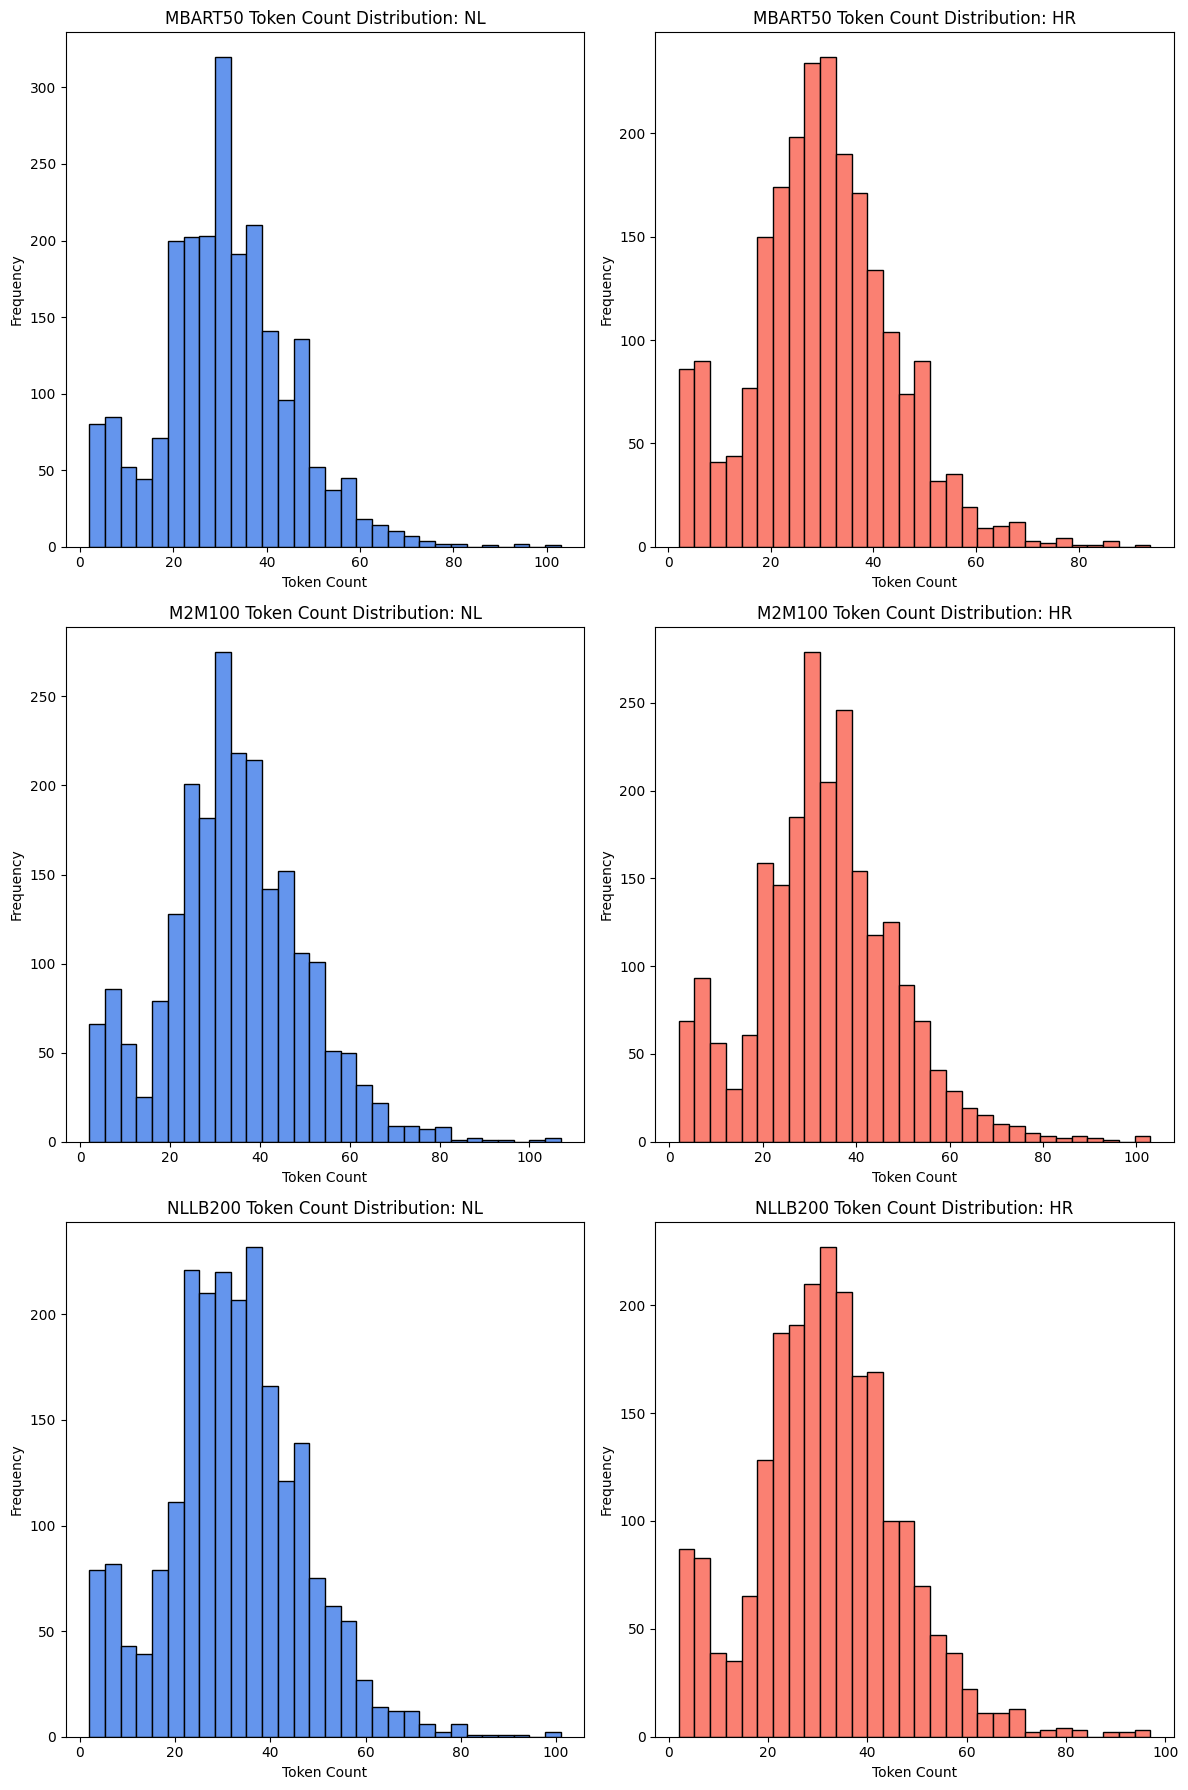

In [29]:
# Define the plot size and the number of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.ravel()  # Flatten the axes array for easy iteration

models = ['MBART50', 'M2M100', 'NLLB200']
token_counts_nl = ['nl_mbart50_count', 'nl_m2m100_count', 'nl_nllb200_count']
token_counts_hr = ['hr_mbart50_count', 'hr_m2m100_count', 'hr_nllb200_count']

# Iterate over the models and their respective token count columns for NL and HR
for i, (model, nl_count, hr_count) in enumerate(zip(models, token_counts_nl, token_counts_hr)):
    # Plot for NL
    ax = axes[i*2]  # Select the appropriate subplot for NL
    ax.hist(evaluation_df[nl_count], bins=30, color='cornflowerblue', edgecolor='black')
    ax.set_title(f'{model} Token Count Distribution: NL')
    ax.set_xlabel('Token Count')
    ax.set_ylabel('Frequency')

    # Plot for HR
    ax = axes[i*2 + 1]  # Select the appropriate subplot for HR
    ax.hist(evaluation_df[hr_count], bins=30, color='salmon', edgecolor='black')
    ax.set_title(f'{model} Token Count Distribution: HR')
    ax.set_xlabel('Token Count')
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust the layout
plt.show()

In [30]:
# Calculate the coverage for a max token length of 64
max_length = 64

# Calculate the percentage of token counts less than or equal to the max length for each tokenizer
coverage_nl_mbart50 = (evaluation_df['nl_mbart50_count'] <= max_length).mean() * 100
coverage_hr_mbart50 = (evaluation_df['hr_mbart50_count'] <= max_length).mean() * 100

coverage_nl_m2m100 = (evaluation_df['nl_m2m100_count'] <= max_length).mean() * 100
coverage_hr_m2m100 = (evaluation_df['hr_m2m100_count'] <= max_length).mean() * 100

coverage_nl_nllb200 = (evaluation_df['nl_nllb200_count'] <= max_length).mean() * 100
coverage_hr_nllb200 = (evaluation_df['hr_nllb200_count'] <= max_length).mean() * 100

# Calculate overall coverage (assuming you want all tokenizers to be within the max length for a row to be considered)
overall_coverage_nl = min(coverage_nl_mbart50, coverage_nl_m2m100, coverage_nl_nllb200)
overall_coverage_hr = min(coverage_hr_mbart50, coverage_hr_m2m100, coverage_hr_nllb200)

# Report the coverage
print(f"Coverage for NL at max length {max_length}:")
print(f"MBART50: {coverage_nl_mbart50:.2f}%")
print(f"M2M100: {coverage_nl_m2m100:.2f}%")
print(f"NLLB200: {coverage_nl_nllb200:.2f}%")
print(f"Overall NL Coverage: {overall_coverage_nl:.2f}%\n")

print(f"Coverage for HR at max length {max_length}:")
print(f"MBART50: {coverage_hr_mbart50:.2f}%")
print(f"M2M100: {coverage_hr_m2m100:.2f}%")
print(f"NLLB200: {coverage_hr_nllb200:.2f}%")
print(f"Overall HR Coverage: {overall_coverage_hr:.2f}%\n")

# The lesser of the two overall coverages will be the effective coverage for both languages.
effective_coverage = min(overall_coverage_nl, overall_coverage_hr)
print(f"Effective coverage for both NL and HR at max length {max_length}: {effective_coverage:.2f}%")

Coverage for NL at max length 64:
MBART50: 98.56%
M2M100: 97.17%
NLLB200: 98.02%
Overall NL Coverage: 97.17%

Coverage for HR at max length 64:
MBART50: 98.52%
M2M100: 97.39%
NLLB200: 97.89%
Overall HR Coverage: 97.39%

Effective coverage for both NL and HR at max length 64: 97.17%
